# Assignment 3
------------------
Useful links:
- TA's hints: https://docs.google.com/document/d/1xNfSBmw59THZJOnNkt57KTOvgAGZxbqeQYCqN7ZMC58/edit
- prob. course: https://www.probabilitycourse.com/chapter11/11_2_5_using_the_law_of_total_probability_with_recursion.php
- youtube series about markov chains: https://www.youtube.com/watch?v=uvYTGEZQTEs
- assignment description: https://mycourses.aalto.fi/pluginfile.php/1352681/mod_resource/content/3/Assignment_3.pdf

## Exercise 1
------------------
A travelling salesman has carpets in his van. He goes from door to door trying to sell them.
Each time he sells one he gets excited and is able to be more convincing and each time he
is rejected and cannot close a deal he gets less excited and is less convincing when dealing
with the next customer. 

This salesman was blessed with 10 levels of excitement and each
interaction either lifts or decreases his excitement by one level. The probabilities for the
salesman to sell a carpet depending on how he feels are {0, 0.1, 0.2, 0.3, … ,0.9}.

- Write the state vector and the Markov matrix.
- Write an algorithm to simulate this Markov chain. 
- Compute the average number of carpets the salesman can sale in time t=500 (sales events)
  when he leaves home in a bad mood and is at the fourth level (p = 0.3) from the bottom and when he feels ok and starts his trip at the sixth level (p = 0.5). For both cases, plot histograms of sold carpets as a function of t.


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# STATE VECTOR AND THE TRANSITION / MARKOV MATRIX

# State vector depends of the mood the salesman is in the beginning of the day.

state_vector = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
transition_matrix = [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.9, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.8, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.7, 0.0, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.6, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.5, 0.0, 0.5, 0.0, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.6, 0.0, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.7, 0.0],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.8],
                    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.9]]

print("The state vector is of from:\n")
print(state_vector)
print("\n\nAnd the transition matrix is of form:\n")
print('\n\n'.join([''.join(['{:7}'.format(item) for item in row]) 
      for row in transition_matrix]))

The state vector is of from:

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


And the transition matrix is of form:

    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0

    0.9    0.0    0.1    0.0    0.0    0.0    0.0    0.0    0.0    0.0

    0.0    0.8    0.0    0.2    0.0    0.0    0.0    0.0    0.0    0.0

    0.0    0.0    0.7    0.0    0.3    0.0    0.0    0.0    0.0    0.0

    0.0    0.0    0.0    0.6    0.0    0.4    0.0    0.0    0.0    0.0

    0.0    0.0    0.0    0.0    0.5    0.0    0.5    0.0    0.0    0.0

    0.0    0.0    0.0    0.0    0.0    0.4    0.0    0.6    0.0    0.0

    0.0    0.0    0.0    0.0    0.0    0.0    0.3    0.0    0.7    0.0

    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.2    0.0    0.8

    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.1    0.9


The average number of carpets the salesman can sale in time t = 500 when he leaves home in a bad mood is 26.669.
When he leaves home in a good mood, the average number of carpets sold in same amount of time is 170.552.




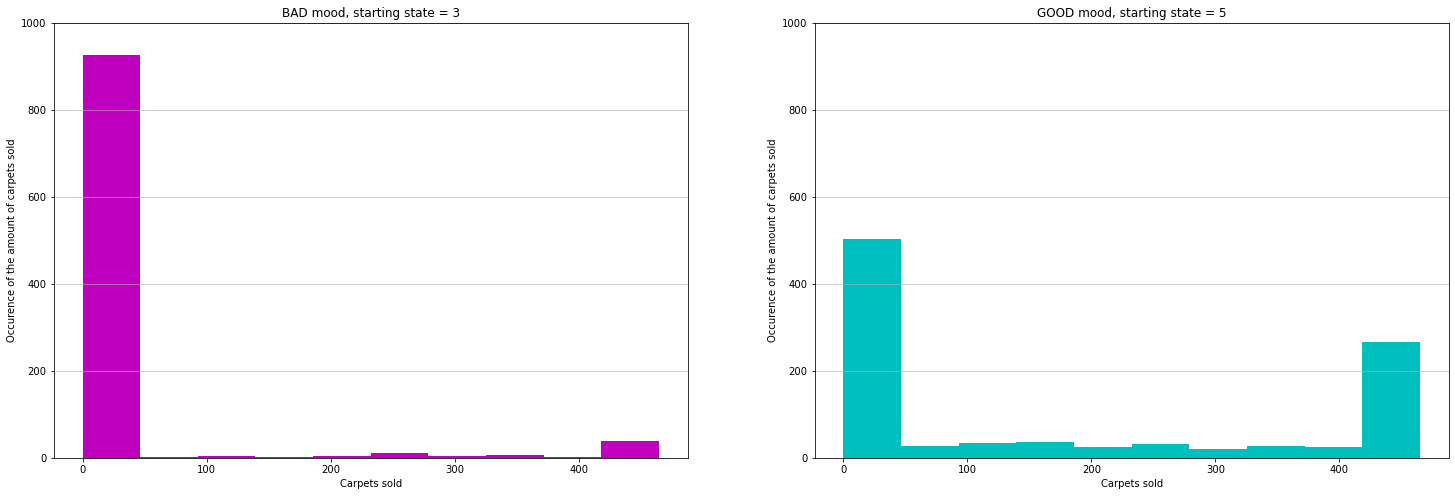

In [25]:
# MARKOV CHAIN ALGORITHM

# starting state for good day is 5
# starting state for bad day is 3

seed = 24092020
t = 500

# The amount of simulations
n = 1000

# Bad mood starting day simulation
simulations_bad = np.zeros((n, 1))

for i in range(n):
    # bad mood
    state = 3
    sales = 0
    for j in range(t):
        if state != 0:
            row = transition_matrix[state]
            if state == 9:
                p_success = row[state]
            else:
                p_success = row[state + 1]
            # sample once from binomial distribution, with success probability based on the current state in the matrix
            event = np.random.binomial(1, p_success)
            # 1: sale, 0: no sale
            if event == 1:
                sales += 1
                if state != 9:
                    state += 1
            else:
                state -= 1
    simulations_bad[i] = sales
    
# Good mood starting day simulation
simulations_good = np.zeros((n, 1))

for i in range(n):
    # good mood
    state = 5
    sales = 0
    for j in range(t):
        if state != 0:
            row = transition_matrix[state]
            if state == 9:
                p_success = row[state]
            else:
                p_success = row[state + 1]
            # sample once from binomial distribution, with success probability
            # based on the current state in the matrix
            event = np.random.binomial(1, p_success)
            # 1: sale, 0: no sale
            if event == 1:
                sales += 1
                if state != 9:
                    state += 1
            else:
                state -= 1
    simulations_good[i] = sales
    
fig = plt.figure(figsize=(25,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.hist(simulations_bad, color = 'm')
ax1.grid(axis='y', alpha=0.75)
ax1.set_xlabel('Carpets sold')
ax1.set_ylabel('Occurence of the amount of carpets sold')
ax1.set_ylim(0,1000)
ax1.set_title('BAD mood, starting state = 3')

ax2.hist(simulations_good, color = 'c')
ax2.grid(axis='y', alpha=0.75)
ax2.set_xlabel('Carpets sold')
ax2.set_ylabel('Occurence of the amount of carpets sold')
ax2.set_ylim(0,1000)
ax2.set_title('GOOD mood, starting state = 5')

print("The average number of carpets the salesman can sale in time t = {} when he leaves home in a bad mood is {}.".format(t, np.mean(simulations_bad)))
print("When he leaves home in a good mood, the average number of carpets sold in same amount of time is {}.\n\n".format(np.mean(simulations_good)))


From the histograms and the means it is clear to see that it matters a lot to the amount of sales succeeded whether the sales man left home in a bad or in a good mood.

## Exercise 2
------------------
(3 p) Let’s take the Poisson process to describe radioactive decay. The number of nuclei is
initially $N_0= 10000$. The nuclei decay (fission) at rate $\lambda = 0.2$ per second. We want to
determine the half-time $t_{1/2}$, that is, the time it takes on average for the number of nuclei
to decay to $N(t) = \frac{N_0}{2}$. You can do this simulation in two ways, the first of which is what
a statistician would do and that is presented in Lecture 3. There is an alternative way based
by simulating the stochastic process in time steps, which is what for example a physicist
would do. In this second way you should first run simulations to find appropriate time
interval (time step) but let’s pretend you have already done this and found that
$\Delta t$ = 0.01 s. By either simulation, determine the mean and variance for $t_{1/2}$ that you get
by averaging over 100 simulations.

(Just to make sure: you only need to implement and simulate in one way.
In addition, needless to say, write the algorithms for the Poisson process, that is, don’t
use some all- inclusive black-box library function.)


https://mathcs.clarku.edu/~djoyce/ma217/poisson.pdf
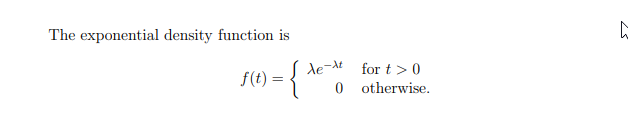


https://courses.lumenlearning.com/boundless-chemistry/chapter/radioactivity/
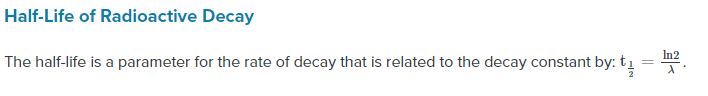

In [2]:
import numpy as np

# The half-life should be around...
lam = 0.2
print("The expected half-life is equal to {}.".format(np.log(2)/lam))

# CALCULATE HALF-TIME MEAN AND VARIANCE IN 100 SIMULATIONS

N0 = 10000
simulations = 100
Nt = N0 / 2

# The exponential distribution specifies the time until the next event.
# t ~ Exp(lambda)

# Repeat the process for 100 simulations.
X = []
for i in range(simulations):
    N = N0
    t = 0
    # Repeat the process until N = 5000
    while N > Nt:
        # Draw the time it takes to reduce N by one from an exponential distribution
        t += np.random.exponential( scale = 1 / (N * lam) )
        # Reduce number of nuclei by one
        N -= 1
    
    # Add the time to a vector X
    X.append(t)

# Take mean and variance over 100 simulation made
mean, var = np.mean(X), np.var(X)

print("Over 100 simulations, we got mean = {} and variance = {}.".format(mean, var))

The expected half-life is equal to 3.465735902799726.
Over 100 simulations, we got mean = 3.4654554123940393 and variance = 0.0025201779615587165.
